Gradient: -0.3575


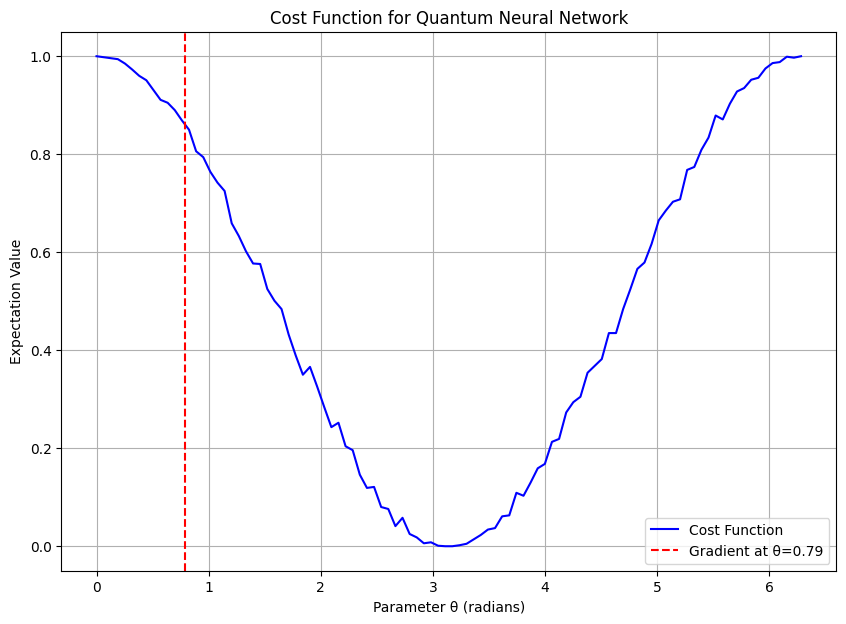

In [3]:
#-------------------------------------------------------------------------
# Training a QNN 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------

from qiskit import Aer, execute, QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------

# Define cost function
def cost_function(param_value):
    circuit = qc.bind_parameters({theta: param_value})
    result = execute(circuit, backend, shots=1000).result()
    counts = result.get_counts()
    expectation = counts.get('0', 0) / sum(counts.values())
    return expectation
#-------------------------------------------------------------------------

# Define a parameterized circuit
qc    = QuantumCircuit(1)
theta = Parameter('θ')
qc.rx(theta, 0)
qc.measure_all()

# Simulate circuit for parameter shift
backend = Aer.get_backend('aer_simulator')

# Parameter shift for gradient computation
param = np.pi / 4.
grad  = (cost_function(param + np.pi / 2.) - cost_function(param - np.pi / 2.)) / 2
print("Gradient:", grad)

# Visualize the cost function
param_values = np.linspace(0, 2 * np.pi, 100)
cost_values = [cost_function(p) for p in param_values]

plt.figure(figsize=(10, 7))
plt.plot(param_values, cost_values, label="Cost Function", color="blue")
plt.axvline(param, color="red", linestyle="--", label=f"Gradient at θ={param:.2f}")
plt.title("Cost Function for Quantum Neural Network")
plt.xlabel("Parameter θ (radians)")
plt.ylabel("Expectation Value")
plt.legend()
plt.grid(True)
plt.show()
